In [6]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns
from sklearn import preprocessing

df = pd.read_csv('advertising.csv')

D = df[['TV', 'Radio', 'Newspaper', 'Sales']]

minmax_scale = preprocessing.MinMaxScaler(feature_range=(0, 1))

scaled_features = minmax_scale.fit_transform(D)

scaled_df = pd.DataFrame(scaled_features, columns=D.columns)

scaled_df

,TV,Radio,Newspaper,Sales
0,0.775786,0.762097,0.605981,0.807087
1,0.148123,0.792339,0.394019,0.346457
2,0.055800,0.925403,0.606860,0.409449
3,0.509976,0.832661,0.511873,0.586614
4,0.609063,0.217742,0.510994,0.641732
...,...,...,...,...
195,0.126818,0.074597,0.118734,0.236220
196,0.316199,0.098790,0.068602,0.488189
197,0.596212,0.187500,0.053650,0.519685
198,0.956713,0.846774,0.579595,0.940945


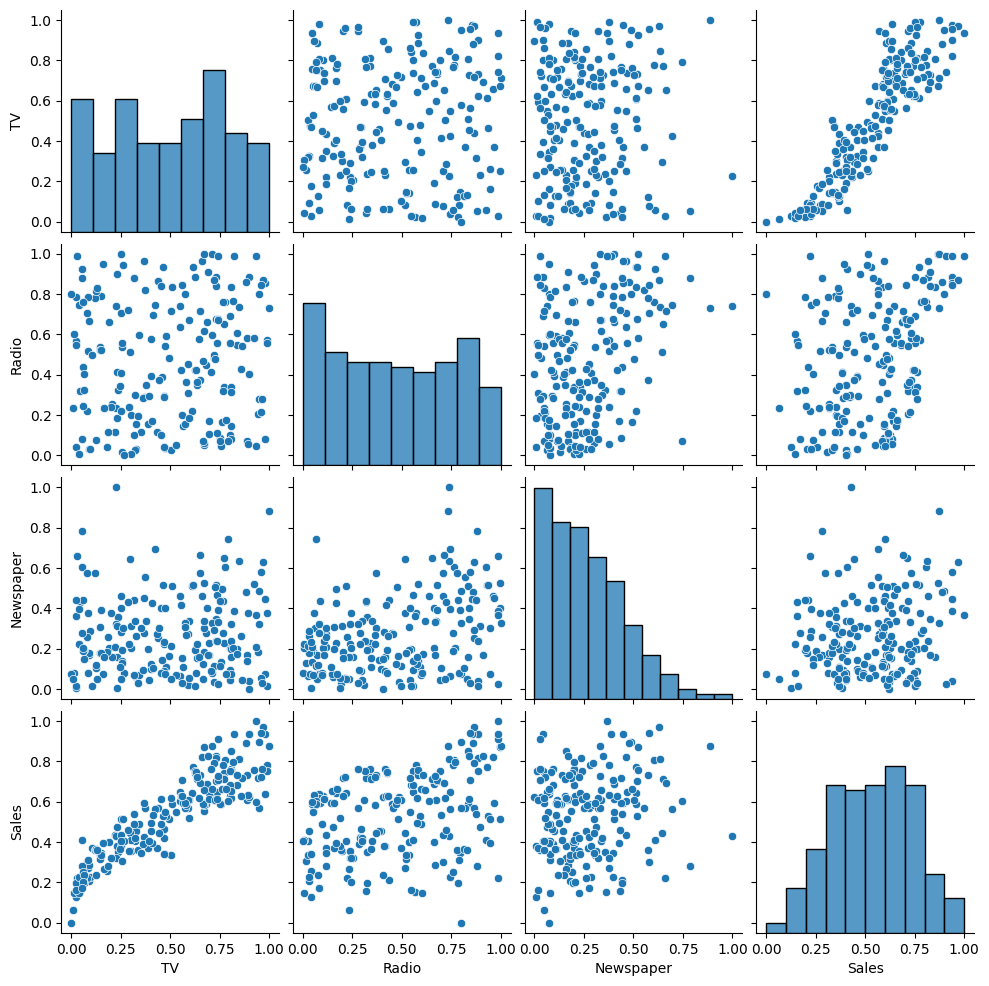

In [7]:
sns.pairplot(scaled_df)

<Axes: >

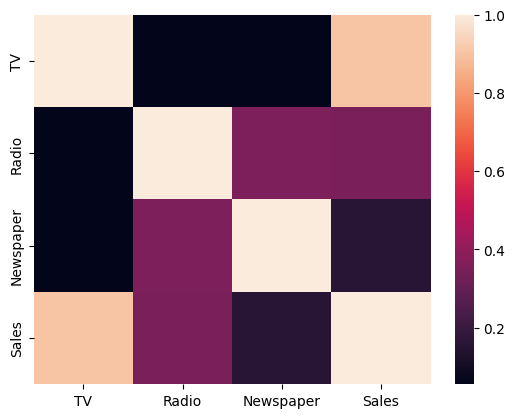

In [8]:
sns.heatmap(scaled_df.corr())

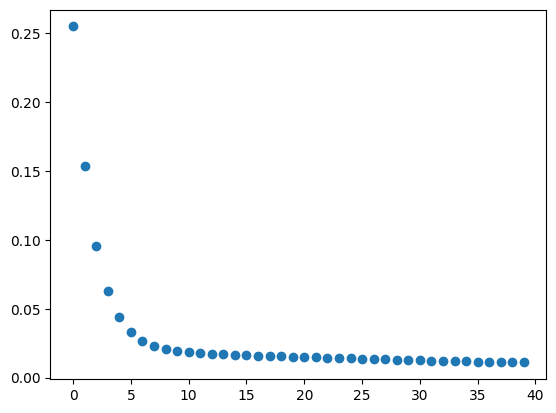

In [73]:
epoc = 40

n_row = scaled_df.shape[0]

X = scaled_df[['TV', 'Radio', 'Newspaper']].values

n_col = X.shape[1]

Y = scaled_df[['Sales']].values

W = np.zeros(n_col)

b = 0

lr = 0.0009


array_of_errors = np.zeros(epoc)

for e in range(epoc):
    
    sum_errors = 0
    
    for i in range(n_row):

        y_model = np.dot(X[i], W) + b
        
        error = y_model - Y[i, 0]
        
        W = W - lr * error * X[i]
        
        b = b - lr * error
        
        sum_errors += error ** 2
    
    array_of_errors[e] = sum_errors / n_row

plt.scatter(range(epoc), array_of_errors)
plt.show()

In [74]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X, Y)

print("Weights sklearn: ", model.coef_)
print("Bias sklearn: ", model.intercept_)
print("Weights my code: ", W)
print("Bias my code: ", b)

Weights sklearn:  [[0.6338432  0.20894728 0.00150253]]
Bias sklearn:  [0.12060381]
Weights my code:  [0.35818345 0.16480893 0.06966516]
Bias my code:  0.26863112452710536


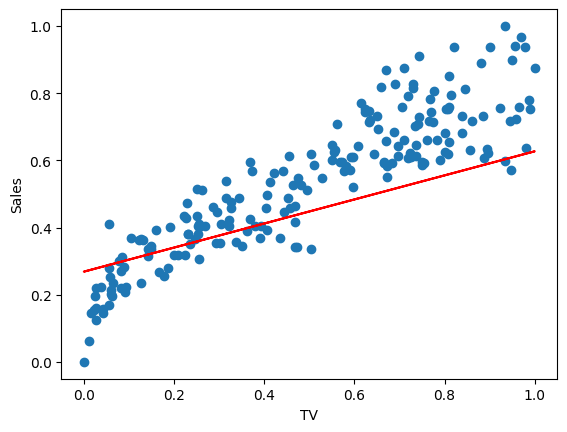

In [75]:
W_final = W
b_final = b

X_TV = scaled_df[['TV']].values  
y_pred = (W_final[0] * X_TV + b_final)

plt.scatter(scaled_df['TV'], Y)
plt.plot(scaled_df['TV'], y_pred, color='red')
plt.xlabel('TV')
plt.ylabel('Sales')
plt.show()


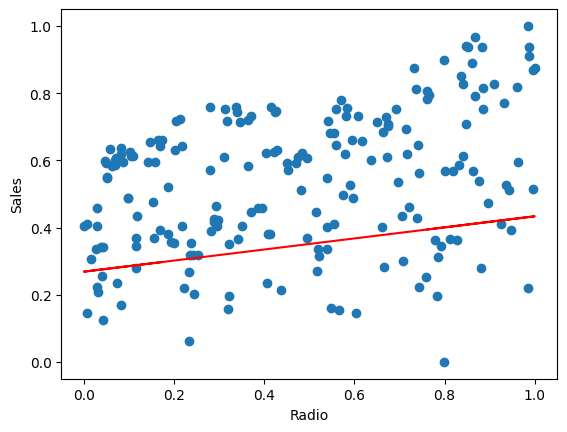

In [76]:
X_Radio = scaled_df[['Radio']].values  
y_pred = (W_final[1] * X_Radio + b_final)

plt.scatter(scaled_df['Radio'], Y)
plt.plot(scaled_df['Radio'], y_pred, color='red')
plt.xlabel('Radio')
plt.ylabel('Sales')
plt.show()

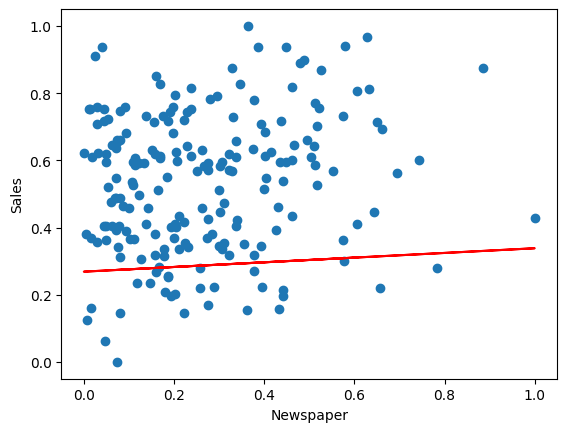

In [77]:
X_Newspaper = scaled_df[['Newspaper']].values  
y_pred = (W_final[2] * X_Newspaper + b_final)

plt.scatter(scaled_df['Newspaper'], Y)
plt.plot(scaled_df['Newspaper'], y_pred, color='red')
plt.xlabel('Newspaper')
plt.ylabel('Sales')
plt.show()
